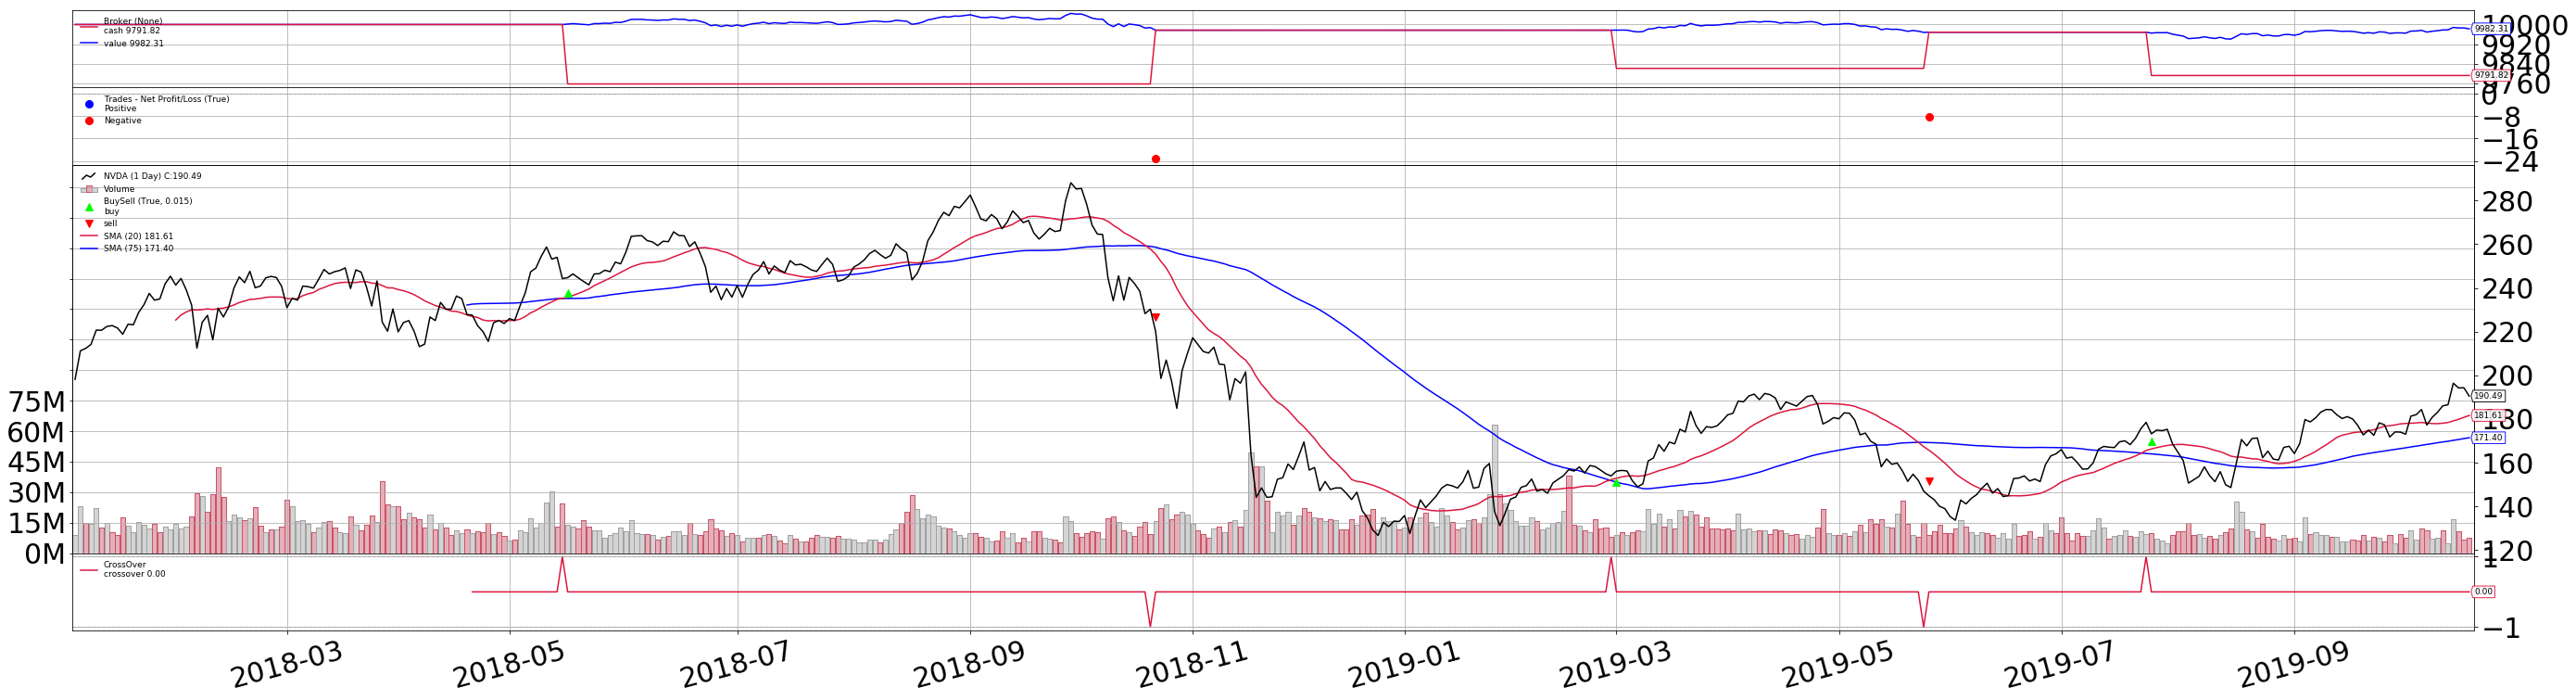

[[<Figure size 2880x720 with 5 Axes>]]

In [13]:
from datetime import datetime
import backtrader as bt

# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=20,  # period for the fast moving average
        pslow=75   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
data = bt.feeds.YahooFinanceData(dataname='NVDA',
                                 fromdate=datetime(2018, 1, 1),
                                 todate=datetime(2019, 12, 31))

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
cerebro.plot(figsize=(100,30))  # and plot it with a single command

In [0]:
!pip install backtrader

In [0]:
import matplotlib.pyplot as plt

In [0]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 40, 10  # that's default image size for this interactive session
pylab.rcParams['font.family'] = 'sans-serif'
pylab.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
pylab.rcParams['font.serif'] = ['Bitstream Vera Sans']
pylab.rcParams["font.size"] = "30"

In [18]:
# Analyzer
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='mysharpe')

thestrats = cerebro.run()
thestrat = thestrats[0]

print('Sharpe Ratio:', thestrat.analyzers.mysharpe.get_analysis())

Sharpe Ratio: OrderedDict([(u'sharperatio', -7.5838362837214275)])
